# Multidimensional Markov Chains

T. Kam

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Multidimensional-Markov-Chains" data-toc-modified-id="Multidimensional-Markov-Chains-1">Multidimensional Markov Chains</a></span><ul class="toc-item"><li><span><a href="#Example-(uncorrelated-chains)" data-toc-modified-id="Example-(uncorrelated-chains)-1.1">Example (uncorrelated chains)</a></span><ul class="toc-item"><li><span><a href="#Joint-Markov-matrix" data-toc-modified-id="Joint-Markov-matrix-1.1.1">Joint Markov matrix</a></span></li><li><span><a href="#State-space-and-nodes" data-toc-modified-id="State-space-and-nodes-1.1.2">State space and nodes</a></span></li><li><span><a href="#Visualize-2D-Markov-chain-as-a-directed-graph" data-toc-modified-id="Visualize-2D-Markov-chain-as-a-directed-graph-1.1.3">Visualize 2D Markov chain as a directed graph</a></span></li></ul></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-2">References</a></span></li></ul></div>

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm

## Example (uncorrelated chains)

Suppose we want to create a joint transitional probability (Markov) matrix for the pair of Markov-chain random variables $(X_{1}, X_{2})$.

Let's use ``SymPy`` to illustrate this algebraically in a two-state example for each Markov-chain random variable.

In [2]:
from sympy import symbols, Matrix, simplify, Mul, zeros, shape
from sympy.physics.quantum import TensorProduct

In [3]:
# Define symbols for transition probabilities
a, b, c, d = symbols("p_{00}, p_{01}, p_{10}, p_{11}")
e, f, g, h = symbols("q_{00}, q_{01}, q_{10}, q_{11}")

Let's visualize this:

In [4]:
# Create our matrices
Q1 = Matrix([[a, b], [c, d]])
Q2 = Matrix([[e, f], [g, h]])

In [5]:
# Create tensor (=> Kronecker) product
P_example = TensorProduct(Q1, Q2)
P_example

Matrix([
[p_{00}*q_{00}, p_{00}*q_{01}, p_{01}*q_{00}, p_{01}*q_{01}],
[p_{00}*q_{10}, p_{00}*q_{11}, p_{01}*q_{10}, p_{01}*q_{11}],
[p_{10}*q_{00}, p_{10}*q_{01}, p_{11}*q_{00}, p_{11}*q_{01}],
[p_{10}*q_{10}, p_{10}*q_{11}, p_{11}*q_{10}, p_{11}*q_{11}]])

### Joint Markov matrix

Impose Markov matrix requirement. Evaluate:

In [6]:
b = 1-a
c = 1-d
f = 1-e
g = 1-h
Q1 = Matrix([[a, b], [c, d]])
Q2 = Matrix([[e, f], [g, h]])
P_markov = TensorProduct(Q1, Q2)
P_markov

Matrix([
[            p_{00}*q_{00},       p_{00}*(1 - q_{00}),       q_{00}*(1 - p_{00}), (1 - p_{00})*(1 - q_{00})],
[      p_{00}*(1 - q_{11}),             p_{00}*q_{11}, (1 - p_{00})*(1 - q_{11}),       q_{11}*(1 - p_{00})],
[      q_{00}*(1 - p_{11}), (1 - p_{11})*(1 - q_{00}),             p_{11}*q_{00},       p_{11}*(1 - q_{00})],
[(1 - p_{11})*(1 - q_{11}),       q_{11}*(1 - p_{11}),       p_{11}*(1 - q_{11}),             p_{11}*q_{11}]])

Each row vector of ``P_markov`` is now a (conditional) probability distribution.

We can check that each row sums up to:

In [7]:
simplify(Matrix(np.sum(P_markov, axis=1)))

Matrix([
[1],
[1],
[1],
[1]])

### State space and nodes

Each node is a pair of state indices $(i,j) \in S_{1} \times S_{2}$. In this example, we chose $S_{1}=S_{2}=S=\{0,1\}$.

Let's get our state space ordered accordingly as a Cartesian product state space:

In [8]:
# States (index) in X1 chain
s1 = range(shape(Q1)[0])

# States (index) in X2 chain
s2 = range(shape(Q2)[0])

# Cartesian product state space - create as list of tuples
S = [s for s in itertools.product(s1, s2)]
print("The state space is ...")
S

The state space is ...


[(0, 0), (0, 1), (1, 0), (1, 1)]

### Visualize 2D Markov chain as a directed graph

This list gives you the listing of each current node to next-period node. 

In [9]:
Node2Node = [t for t in itertools.product(S, S)]
Node2Node

[((0, 0), (0, 0)),
 ((0, 0), (0, 1)),
 ((0, 0), (1, 0)),
 ((0, 0), (1, 1)),
 ((0, 1), (0, 0)),
 ((0, 1), (0, 1)),
 ((0, 1), (1, 0)),
 ((0, 1), (1, 1)),
 ((1, 0), (0, 0)),
 ((1, 0), (0, 1)),
 ((1, 0), (1, 0)),
 ((1, 0), (1, 1)),
 ((1, 1), (0, 0)),
 ((1, 1), (0, 1)),
 ((1, 1), (1, 0)),
 ((1, 1), (1, 1))]

Or, if you like pictures, let's see the two-dimensional Markov chain here as a directed graph:

In [10]:
# Example - two independent Markov chains
Q1 = np.array([[0.1, 0.9], [0.6, 0.4]])
Q2 = np.array([[0.3, 0.7], [0.8, 0.2]])
# 2D Markov matrix
Q = np.kron(Q1, Q2)
Q

array([[0.03, 0.07, 0.27, 0.63],
       [0.08, 0.02, 0.72, 0.18],
       [0.18, 0.42, 0.12, 0.28],
       [0.48, 0.12, 0.32, 0.08]])

In [11]:
Q.sum(axis=1)

array([1., 1., 1., 1.])

In [12]:
# Instantiate multi-edged directed graph
G = nx.MultiDiGraph()

# Storage for labels and associate edges
labels={}
edge_labels={}

# Generate and store edge and node info, store in G
for i, s_now in enumerate(S):
    labels[s_now] = str(s_now)
    for j, s_next in enumerate(S):
        q = Q[i][j]
        # Store only positive-weighted edge
        if q > 0:
            G.add_edge(s_now,
                       s_next,
                       weight=q,
                       label="{:.02f}".format(q))
            edge_labels[(s_now, s_next)] = label="{:.02f}".format(q)

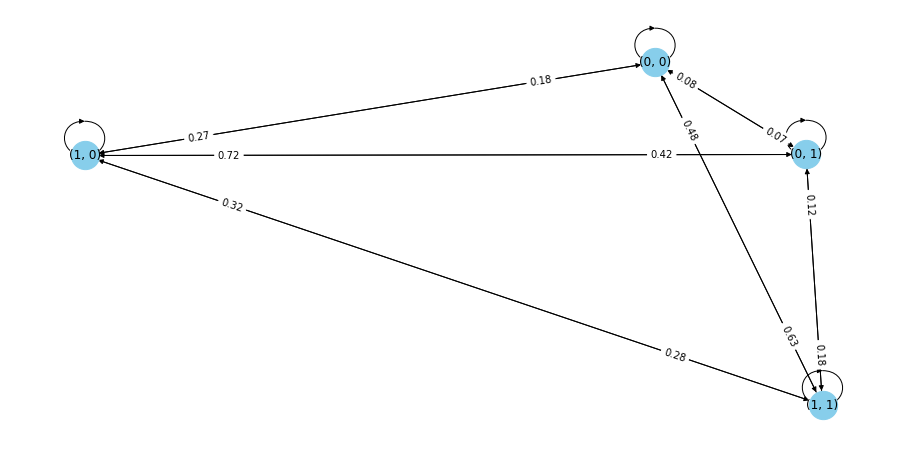

In [13]:
plt.figure(figsize=(16,8))
# pos = nx.circular_layout(G)
# pos = nx.spring_layout(G, seed=3113794652)
pos = nx.kamada_kawai_layout(G)
# TK-original
nx.draw_networkx(G, pos, 
                 node_color="skyblue", 
                 node_size=800,
                 with_labels=True,
                )
# Add trans-probabilities for edges
nx.draw_networkx_edge_labels(G, pos, edge_labels, 
                                     label_pos=0.2)
plt.axis('off')
plt.show()

# References

* Ching, Wai-Ki, Shu-Qin Zhang and Michael K. Ng (2007): "On Multi-dimensional Markov Chain
Models." [*Pacific Journal of Optimization*.](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.592.7474&rep=rep1&type=pdf)

* Ching, Wai-Ki, *High-dimensional Markov Chain Models and Their Applications*. [Slide deck](https://hkumath.hku.hk/~wkc/talks/markovchain.pdf).